### ***Data Modeling***

#### ***`Data Overview`***

In [1]:
# Library
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
# Show full column content
pd.set_option('display.max_colwidth', None)

# File folders and working directories
working_dir = Path('.').cwd()
file_path = working_dir.parent / 'data/Dataquest2025'
file_name = ''.join([s.as_posix() for s in file_path.glob('*.csv')])

# Load csv into DataFrame
df = pd.read_csv(file_name)

# Replace 'NONE' with NaN in 'item'
df['item'] = df['item'].apply(lambda s: np.nan if s == 'NONE' else s)

# Data Overview
print(df.head(5))

   idcol interaction   int_date  item     page        tod item_type  \
0    755     DISPLAY  17-Jan-23   NaN  Screen1  Afternoon       ALL   
1   4521     DISPLAY  27-Feb-23   NaN  Screen1  Afternoon       ALL   
2   4521     DISPLAY  18-Feb-23   NaN  Screen1  Afternoon       ALL   
3   4521     DISPLAY  30-Jan-23   NaN  Screen1    Morning       ALL   
4   4521       CLICK   5-Feb-23  IBAB  Screen1  Afternoon    INSURE   

      item_descrip   segment beh_segment   active_ind  
0              NaN  segment3         B01  Semi Active  
1              NaN  segment1         B07  Semi Active  
2              NaN  segment1         B07  Semi Active  
3              NaN  segment1         B07  Semi Active  
4  GENERIC MESSAGE  segment1         B07  Semi Active  


#### ***`Initial Data Anaysis (EDA)`***

`Total Number of Records`

In [3]:
print(f'The total number of records: {len(df):,.2f}')

The total number of records: 400,000.00


`Total Number of Missing Records`

In [4]:
print('Total number of missing values per feature/column')
print('*'*50)

total_missing_values = df.isna().sum().reset_index()
print(total_missing_values)

Total number of missing values per feature/column
**************************************************
           index       0
0          idcol       0
1    interaction       0
2       int_date       0
3           item  173638
4           page       0
5            tod       0
6      item_type       0
7   item_descrip  173638
8        segment       0
9    beh_segment       0
10    active_ind       0


`Duplicated Records`

In [5]:
duplicated_records = df.duplicated().sum()

print(f'Total number of duplicated records: {duplicated_records:,}')

Total number of duplicated records: 30,317


`Checking Data types`

In [6]:
print('Existing Data types')
print('*' * 30)
print(df.dtypes)

Existing Data types
******************************
idcol            int64
interaction     object
int_date        object
item            object
page            object
tod             object
item_type       object
item_descrip    object
segment         object
beh_segment     object
active_ind      object
dtype: object


`Data Summary`

In [7]:
# Numerical Data Summary
print(df.select_dtypes(exclude='object').describe().T)

          count          mean           std    min         25%          50%  \
idcol  400000.0  3.395855e+09  8.169713e+09  755.0  44700497.5  114590202.0   

               75%           max  
idcol  321519638.0  2.572863e+10  


In [8]:
# Categorical Data Summary
print(df.select_dtypes(include='object').describe().T)

               count unique                   top    freq
interaction   400000      3               DISPLAY  173638
int_date      400000     88             28-Feb-23   11215
item          226362    103                  CTLN   28177
page          400000      2               Screen1  344164
tod           400000      4               Morning  144735
item_type     400000      7                   ALL  173638
item_descrip  226362    100  DDA TEMP LOANS BATCH   28177
segment       400000      4              segment1  162703
beh_segment   400000     50                   B01  220257
active_ind    400000      3                Active  173842


#### ***`Data Cleaning & Formatting`***

In [9]:
# Remove Item Description
data_frame = df.copy()
data_frame.drop('item_descrip', axis=1, inplace=True)

print(data_frame.head())

   idcol interaction   int_date  item     page        tod item_type   segment  \
0    755     DISPLAY  17-Jan-23   NaN  Screen1  Afternoon       ALL  segment3   
1   4521     DISPLAY  27-Feb-23   NaN  Screen1  Afternoon       ALL  segment1   
2   4521     DISPLAY  18-Feb-23   NaN  Screen1  Afternoon       ALL  segment1   
3   4521     DISPLAY  30-Jan-23   NaN  Screen1    Morning       ALL  segment1   
4   4521       CLICK   5-Feb-23  IBAB  Screen1  Afternoon    INSURE  segment1   

  beh_segment   active_ind  
0         B01  Semi Active  
1         B07  Semi Active  
2         B07  Semi Active  
3         B07  Semi Active  
4         B07  Semi Active  


In [10]:
# Convert ID Column to String and rename the column to user_id
data_frame['idcol'] = data_frame['idcol'].astype(str)
data_frame.rename({'idcol': 'user_id'}, axis=1, inplace=True)

In [11]:
# Convert all column values to lowercase
for v in data_frame.columns:
    if data_frame[v].dtype == 'object':
        data_frame[v] = data_frame[v].str.lower()
        
print(data_frame.head())

  user_id interaction   int_date  item     page        tod item_type  \
0     755     display  17-jan-23   NaN  screen1  afternoon       all   
1    4521     display  27-feb-23   NaN  screen1  afternoon       all   
2    4521     display  18-feb-23   NaN  screen1  afternoon       all   
3    4521     display  30-jan-23   NaN  screen1    morning       all   
4    4521       click   5-feb-23  ibab  screen1  afternoon    insure   

    segment beh_segment   active_ind  
0  segment3         b01  semi active  
1  segment1         b07  semi active  
2  segment1         b07  semi active  
3  segment1         b07  semi active  
4  segment1         b07  semi active  


In [12]:
# Convert date column to datetime
data_frame['int_date'] = pd.to_datetime(data_frame['int_date'], errors='coerce')

In [13]:
# Remove duplicated values
df_pandas = data_frame[~data_frame.duplicated(keep='first')]

In [14]:
# Mark customers with no item interaction as 'no-item'
df_pandas['item'] = df_pandas['item'].fillna('no_item_id')
print(df_pandas.head(10))

  user_id interaction   int_date        item     page        tod item_type  \
0     755     display 2023-01-17  no_item_id  screen1  afternoon       all   
1    4521     display 2023-02-27  no_item_id  screen1  afternoon       all   
2    4521     display 2023-02-18  no_item_id  screen1  afternoon       all   
3    4521     display 2023-01-30  no_item_id  screen1    morning       all   
4    4521       click 2023-02-05        ibab  screen1  afternoon    insure   
5    4521    checkout 2023-02-05        ibab  screen1  afternoon    insure   
6    6145     display 2023-02-26  no_item_id  screen1    evening       all   
7    6145     display 2023-01-27  no_item_id  screen1      early       all   
8    6145     display 2023-02-10  no_item_id  screen1    morning       all   
9    6145     display 2023-01-10  no_item_id  screen1  afternoon       all   

    segment beh_segment   active_ind  
0  segment3         b01  semi active  
1  segment1         b07  semi active  
2  segment1         b07 

#### ***`Data Visualisation`***

In [15]:
# Plot bar chart of category counts for a given feature
def plot_feature_distribution_count(df: pd.DataFrame, feature: str, palette: str = 'viridis') -> None:
    plt.style.use('ggplot') 
    plt.figure(figsize=(8, 4))

    sorted_order = df[feature].value_counts().index 

    sns.countplot(data=df, x=feature, order=sorted_order, palette=palette)

    plt.xlabel(feature.capitalize()) 
    plt.title(f'Distribution of {feature}')
    
    plt.tight_layout(pad=2)
    plt.show()


In [16]:
# Plots top-N frequent categories as a horizontal bar chart
def plot_high_cardinal_features(df: pd.DataFrame, feature: str, color: str = 'red', top_n: int = 10) -> None:
    data = df.groupby(feature).size().reset_index(name='count')
    
    top_data = data.sort_values('count', ascending=False).head(top_n)
    
    plt.style.use('ggplot')
    plt.figure(figsize=(6, 6))
    
    plt.barh(top_data[feature], top_data['count'], color=color)
    
    plt.gca().invert_yaxis()
    
    plt.xlabel('Count')
    plt.ylabel(feature.capitalize())
    plt.title(f'Top {top_n} {feature.capitalize()} by Frequency')
    
    plt.tight_layout(pad=2)
    plt.show()


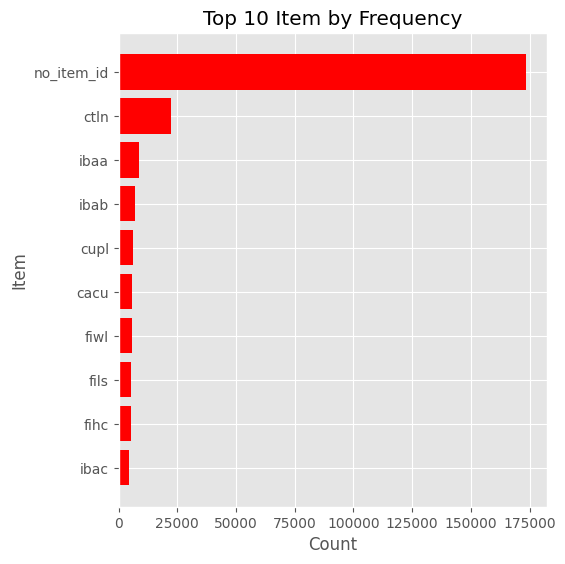

In [17]:
# Visualize most common items
plot_high_cardinal_features(df_pandas, 'item')

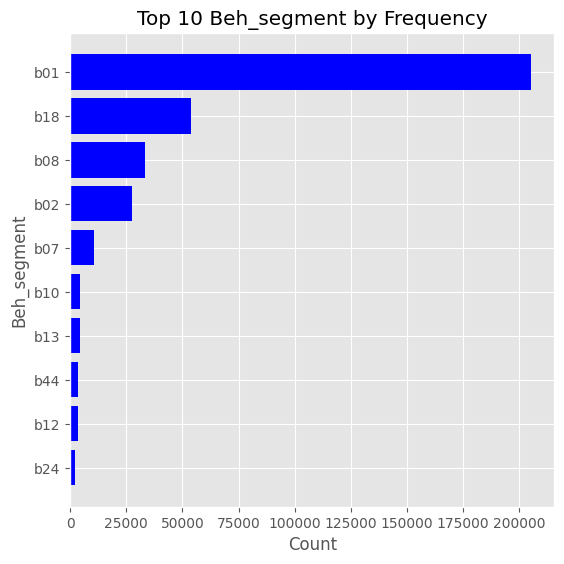

In [18]:
# Visualize most common behavioral segments
plot_high_cardinal_features(df_pandas, 'beh_segment', 'blue')

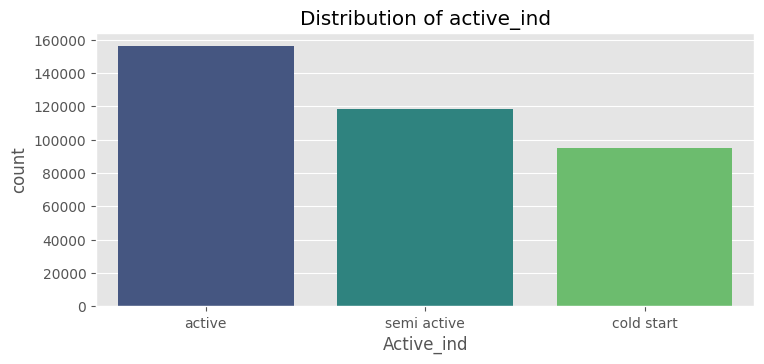

In [19]:
# Visualize distribution of active indicator
plot_feature_distribution_count(df_pandas, 'active_ind')

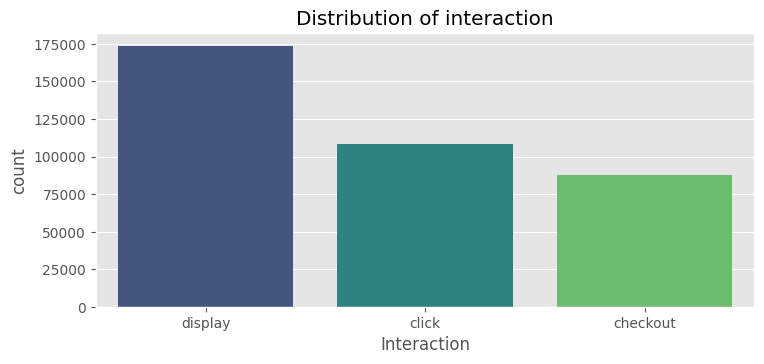

In [20]:
# Visualize distribution of interaction types
plot_feature_distribution_count(df_pandas, 'interaction')

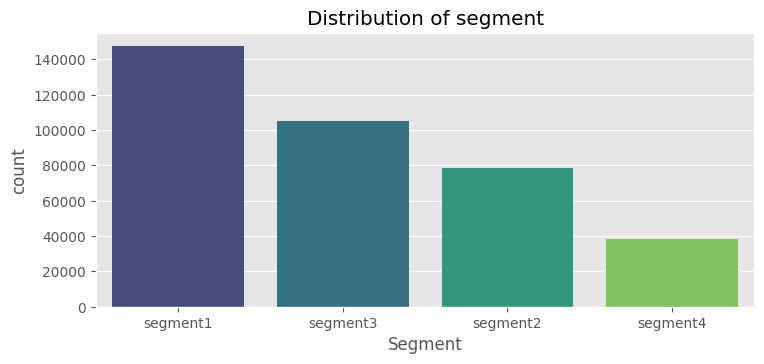

In [21]:
# Visualize distribution of users segments
plot_feature_distribution_count(df_pandas, 'segment')


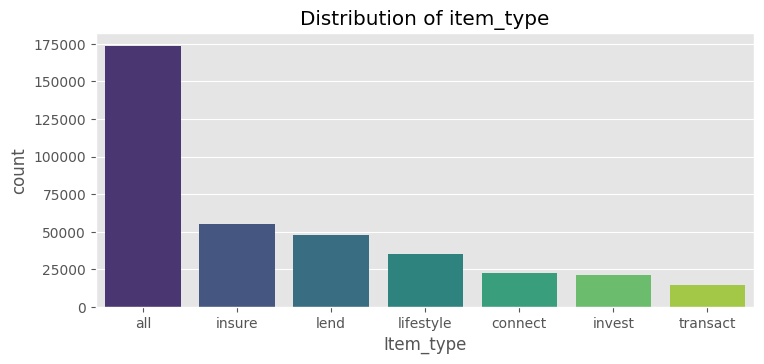

In [22]:
# Visualize distribution of item types
plot_feature_distribution_count(df_pandas, 'item_type')


- Customers primarily interact with items related to Insure, Lend, and Lifestyle categories.
- Maintaining clear visibility and prioritizing these item types on top of the interface can boost customer engagement and satisfaction.

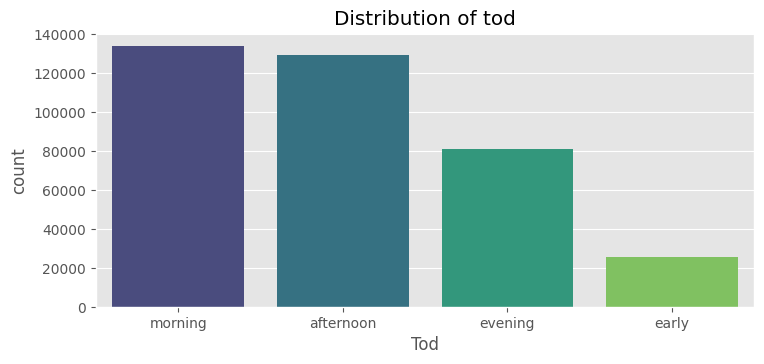

In [24]:
# Visualize distribution of time of day
plot_feature_distribution_count(df_pandas, 'tod')


- Customers show high interaction rates during the morning and afternoon.
- Ensuring system reliability and zero downtime during these peak hours can enhance customer trust and improve operational efficiency.

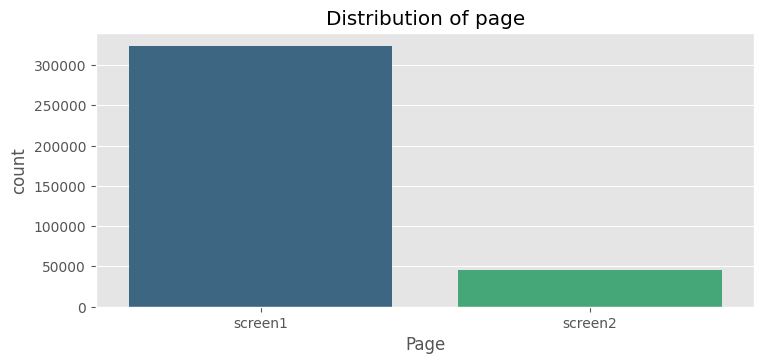

In [25]:
# Visualize distribution of page visits
plot_feature_distribution_count(df_pandas, 'page')

- Most customers spend their time interacting with items on the first screen.
- This suggests that placing the most important or high-priority items on the first screen can facilitate faster and more frequent interactions.

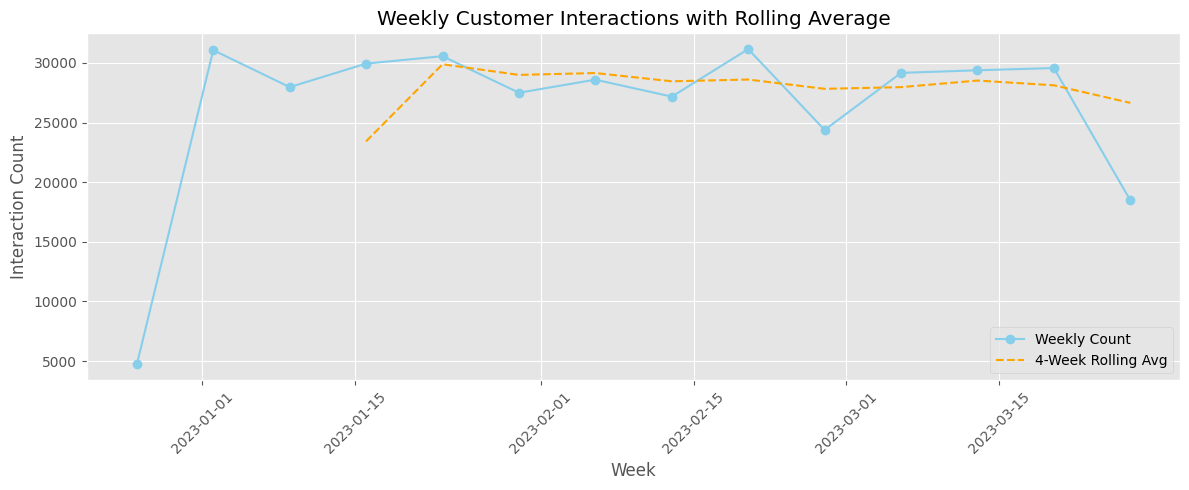

In [26]:
# Ensure 'int_date' is datetime type
df_pandas['int_date'] = pd.to_datetime(df_pandas['int_date'])

# Count interactions grouped by week ending Sunday
weekly_counts = df_pandas['int_date'].dt.to_period('W-SUN').value_counts().sort_index()
weekly_counts.index = weekly_counts.index.to_timestamp()  # Convert period to timestamp

# Compute 4-week rolling average
rolling_avg = weekly_counts.rolling(window=4).mean()

# Plot weekly counts and rolling average
plt.figure(figsize=(12, 5))
plt.plot(weekly_counts.index, weekly_counts.values, label='Weekly Count', marker='o', linestyle='-', color='skyblue')
plt.plot(rolling_avg.index, rolling_avg.values, label='4-Week Rolling Avg', linestyle='--', color='orange')

plt.title('Weekly Customer Interactions with Rolling Average')
plt.xlabel('Week')
plt.ylabel('Interaction Count')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


- No significant changes in users' interactions on a weekly basis — interaction levels remain steady.

- Focus should be on optimizing the current recommendation system to enhance users' engagement and drive growth.


#### ***`First Feature Engineering`***

In [27]:
dataset = df_pandas.copy()
dataset = dataset.reset_index(drop=True)
print(dataset.head())

  user_id interaction   int_date        item     page        tod item_type  \
0     755     display 2023-01-17  no_item_id  screen1  afternoon       all   
1    4521     display 2023-02-27  no_item_id  screen1  afternoon       all   
2    4521     display 2023-02-18  no_item_id  screen1  afternoon       all   
3    4521     display 2023-01-30  no_item_id  screen1    morning       all   
4    4521       click 2023-02-05        ibab  screen1  afternoon    insure   

    segment beh_segment   active_ind  
0  segment3         b01  semi active  
1  segment1         b07  semi active  
2  segment1         b07  semi active  
3  segment1         b07  semi active  
4  segment1         b07  semi active  


In [28]:
# Rename columns for clearer feature names
renamed_cols = {
    'idcol': 'user_id',
    'item': 'item_id',
    'page': 'screen_page',
    'tod': 'time_of_day',
    'active_ind': 'active_mode'
}

dataset.rename(renamed_cols, axis=1, inplace=True)

print(dataset.head())

  user_id interaction   int_date     item_id screen_page time_of_day  \
0     755     display 2023-01-17  no_item_id     screen1   afternoon   
1    4521     display 2023-02-27  no_item_id     screen1   afternoon   
2    4521     display 2023-02-18  no_item_id     screen1   afternoon   
3    4521     display 2023-01-30  no_item_id     screen1     morning   
4    4521       click 2023-02-05        ibab     screen1   afternoon   

  item_type   segment beh_segment  active_mode  
0       all  segment3         b01  semi active  
1       all  segment1         b07  semi active  
2       all  segment1         b07  semi active  
3       all  segment1         b07  semi active  
4    insure  segment1         b07  semi active  


#### ***`Loading Processed Data`***

In [29]:
# Save DataFrame as CSV in processed data folder
def write_processed_data_to_csv(file_name: str, df: pd.DataFrame) -> None:
    """Save a DataFrame to CSV in the processed data directory."""
    path = (working_dir.parent / 'data/processed')
    path.mkdir(parents=True, exist_ok=True)
    file_path = path / file_name
    df.to_csv(file_path, index=False)
    print(f'Processed data saved to {file_path.as_posix()}')

write_processed_data_to_csv('clean_dataset_fnb.csv', dataset)


Processed data saved to /mnt/d/research-workspace/workx-projects/fnb-dataquest-recosys/data/processed/clean_dataset_fnb.csv
